In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here

#LOADING DATA INTO A DATAFRAME
train = pd.read_csv("train.csv")
#print(train)
print("Shape of the train data: ",train.shape)
print("<------------------------------------------>")


#CHECKING ALL THE STATISTICAL PROPERTIES
print("Statistical Properties of the train data are as follows: ")
print(train.describe())
print("<------------------------------------------>")
# Drop the Id.
train.drop('Id',axis=1,inplace=True)
print()
print("<------------------------------------------>")
#CHECKING SKEWNESS OF DATA
print("Skewness for the different features is as shown below: ")
print(train.skew())

print("<------------------------------------------>")

# Code ends here.

Shape of the train data:  (1070, 9)
<------------------------------------------>
Statistical Properties of the train data are as follows: 
                Id          age          sex          bmi     children  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean    668.617757    39.030841     0.495327    30.490196     1.128037   
std     385.470930    13.951271     0.500212     6.109707     1.211675   
min       1.000000    18.000000     0.000000    15.960000     0.000000   
25%     333.250000    27.000000     0.000000    26.030000     0.000000   
50%     676.500000    39.000000     0.000000    30.140000     1.000000   
75%    1000.500000    51.000000     1.000000    34.320000     2.000000   
max    1337.000000    64.000000     1.000000    53.130000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1070.000000  1070.000000   1070.000000     1070.000000  
mean      0.203738     1.516822  13262.895208        0.568224  
st

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

smoker   charges    0.778644
charges  smoker     0.778644
dtype: float64


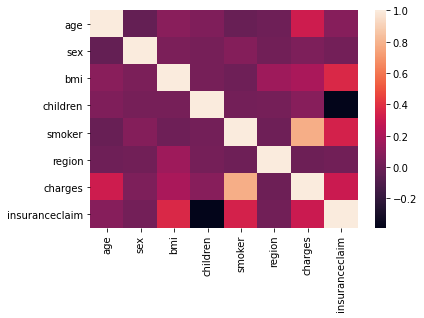

In [3]:
# Code starts here
# Plotting a heatmap using to check for correlation between the features
sns.heatmap(train.corr())

# Selecting upper and lower threshold
upper_threshold = 0.5
lower_threshold = -0.5

# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')

# Select the highest correlation pairs having correlation greater than upper threshold and lower than lower threshold
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_var_list)
# Code ends here.

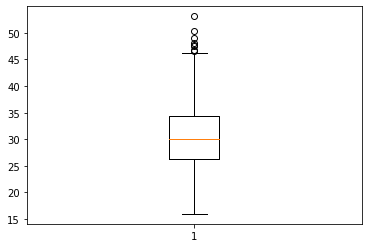

1    484
0    372
Name: insuranceclaim, dtype: int64
<----------------------------------------------------->


In [4]:
# Code starts here

plt.boxplot(X_train["bmi"])
plt.show()

q_value = X_train["bmi"].quantile(0.95)

print (y_train.value_counts())

print("<----------------------------------------------------->")

# Code ends here.

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.033447  0.057559  0.036862  0.006142 -0.008368  0.324539
sex      -0.033447  1.000000  0.028277  0.034143  0.088588  0.029539  0.064491
bmi       0.057559  0.028277  1.000000  0.011344  0.000450  0.181431  0.165795
children  0.036862  0.034143  0.011344  1.000000  0.031370  0.026811  0.088362
smoker    0.006142  0.088588  0.000450  0.031370  1.000000  0.002038  0.782773
region   -0.008368  0.029539  0.181431  0.026811  0.002038  1.000000 -0.011060
charges   0.324539  0.064491  0.165795  0.088362  0.782773 -0.011060  1.000000




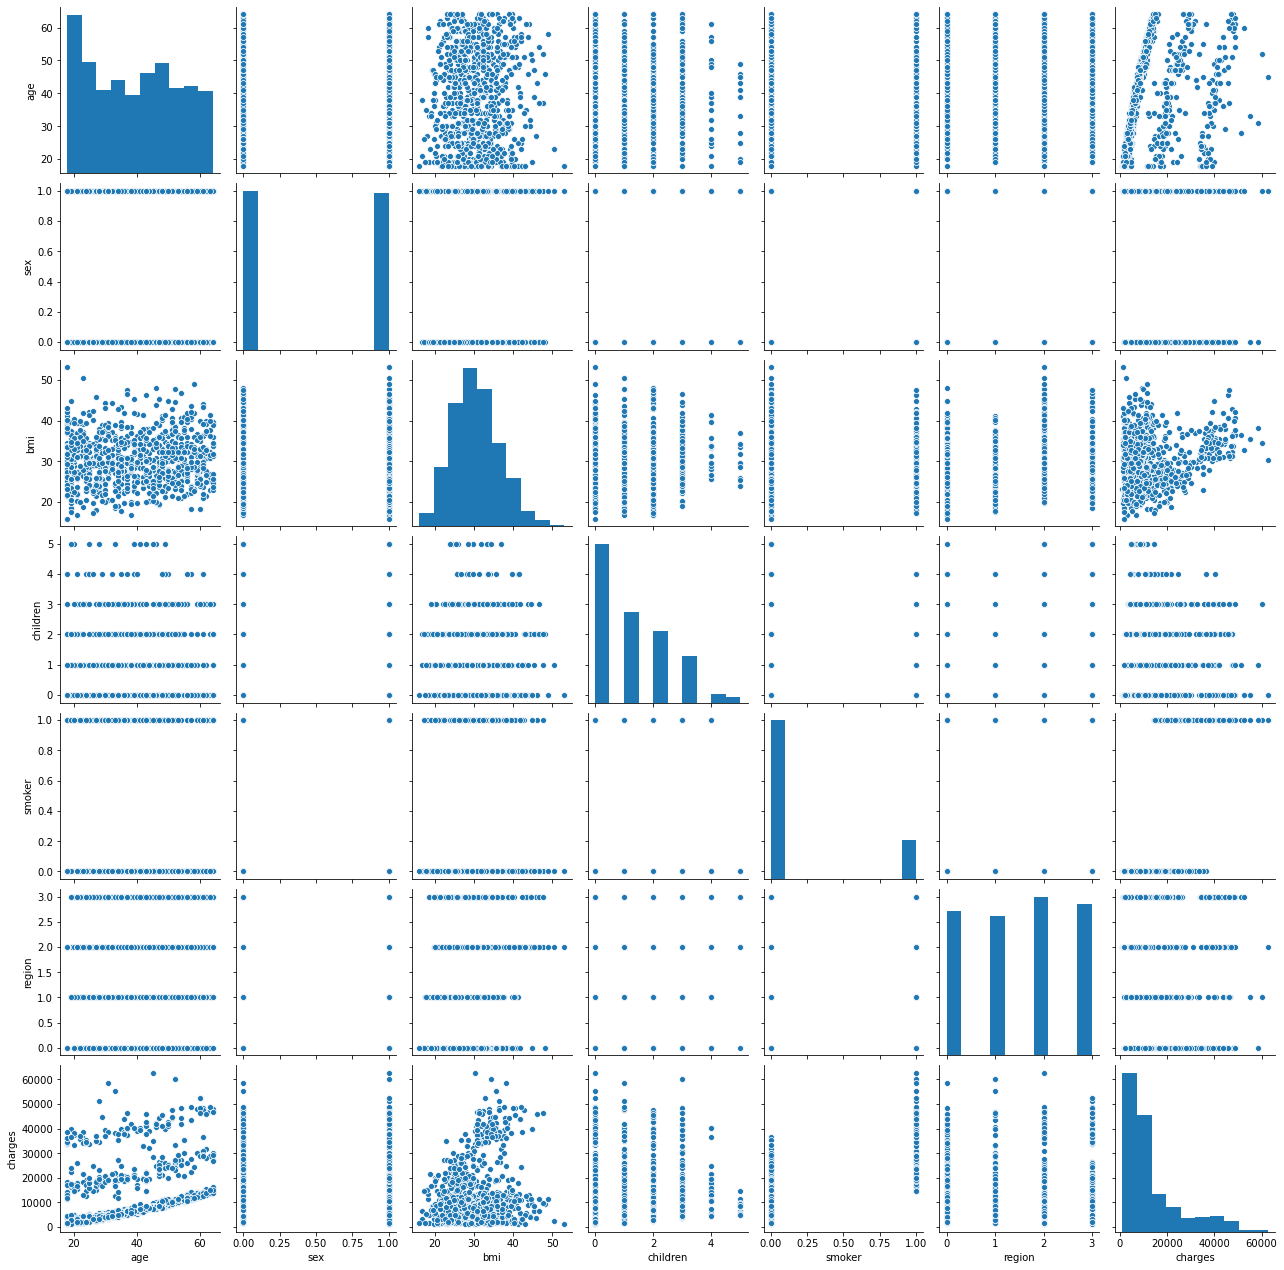

In [5]:
relation = X_train.corr()

print(relation)
print("\n")
sns.pairplot(X_train)
plt.show()
print("\n")

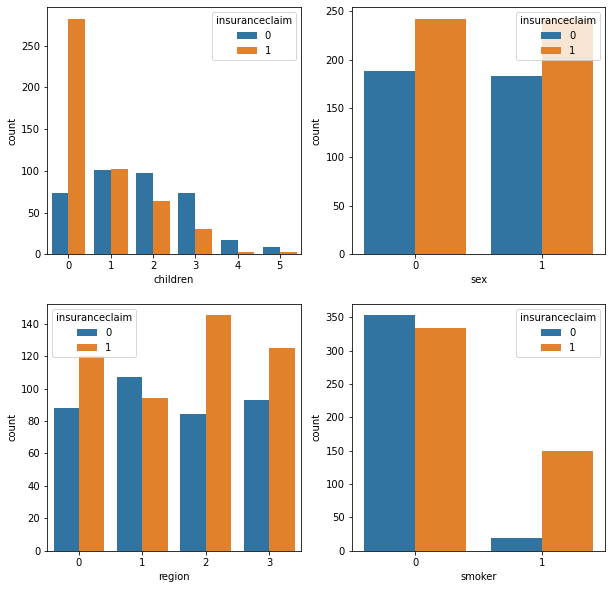

In [6]:
cols = ['children','sex','region','smoker']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))

for i in range(0,2):
    for j in range(0,2):
        col = cols[ i * 2 + j]
        sns.countplot(x=X_train[col], hue=y_train, ax=axes[i,j])

#print("<----------------------------------------------------->")
print("\n")


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [26]:
# Code starts here
from sklearn.model_selection import cross_val_score
# Split into features and target
X = train.drop("insuranceclaim",axis=1)
y = train["insuranceclaim"]

# Separate into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 6)

# parameters for grid search
parameters = {'C':[0.1,0.85,500,8000],"penalty":["l1", "l2"]}
# Code starts here
LOR= LogisticRegression(random_state=6)

grid = GridSearchCV(estimator = LOR, param_grid = parameters,cv=5)

grid.fit(X_train, y_train)

# print how our model looks after hyper-parameter tuning
print("\n The best estimator across ALL searched params :",grid.best_estimator_)
print("\n The best parameters across ALL searched params :",grid.best_params_)
print("\n The best score across ALL searched params :",grid.best_score_)


print(grid.best_estimator_)

y_pred = grid.predict(X_test)

cf = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix :\n",cf)
accuracy = accuracy_score(y_test, y_pred)

print ("Accuracy for Grid is : ",accuracy)

all_accuracies = cross_val_score(estimator=LOR, X=X_train, y=y_train, cv=5)
print("Accuracy after cross validation :",all_accuracies.mean())


# Code ends here.


 The best estimator across ALL searched params : LogisticRegression(C=500, random_state=6)

 The best parameters across ALL searched params : {'C': 500, 'penalty': 'l2'}

 The best score across ALL searched params : 0.7886032911736706
LogisticRegression(C=500, random_state=6)
The Confusion Matrix :
 [[ 65  25]
 [ 20 104]]
Accuracy for Grid is :  0.7897196261682243
Accuracy after cross validation : 0.7956208350333196


PREDICTED PROBABILITY : 0.9616839028406708
ROC_AUC SCORE is : 0.874731182795699


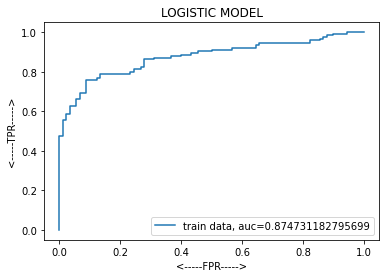

In [27]:
#CHECKING METRICS 
# Code starts here
#score = roc_auc_score(y_test, y_pred)

y_pred_proba = grid.predict_proba(X_test)[:, 1]
print("PREDICTED PROBABILITY :",y_pred_proba[0])

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("ROC_AUC SCORE is :",roc_auc)
plt.plot(fpr,tpr,label="train data, auc="+str(roc_auc))
plt.xlabel("<-----FPR----->")
plt.ylabel("<-----TPR----->")
plt.title("LOGISTIC MODEL")
plt.legend(loc=4)
plt.show()
# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [13]:

# Code starts here
test = pd.read_csv("test.csv")

# Storing the id from the test file
id_ = test["Id"]

# Dropping the same columns from the test data
test.drop(["Id"],1,inplace=True)

# Predict on the test data
y_pred_test = grid.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({"Id":id_,"insuranceclaim":y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv("LOR_final_submission.csv",index=False)

# Code ends here.

In [15]:
#EXTRASSSS
#---1) Random sized search
#RSV = RandomizedSearchCV(param_distributions = parameters,estimator = LOR,random_state=9)
#RSV.fit(X_train, y_train)###################################################################################################################3'C':[0.1,0.5,1,5]
#print("\n The best estimator across ALL searched params:\n",RSV.best_params_)####################################################

#print(RSV.best_estimator_)
#y_pred = RSV.predict(X_test)
#print ("Accuracy for RSV is ",accuracy)


#---2) ---CHECKING METRICS
#print("Predicted probability :",y_pred_proba)
#y_pred_proba = RSV.predict_proba(X_test)[:, 1]

